<a href="https://colab.research.google.com/github/Sayanik-tech/Deep_Learning_CNN/blob/main/CIFAR10_Dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense ,  Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog',' horse','ship','truck']

'deer'

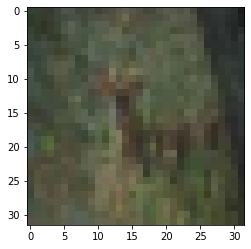

In [ ]:
# Visualizing the Images
plt.imshow(x_train[10])
classes[y_train[10][0]]

In [ ]:
# normalize the image
x_train , x_test = x_train/255 , x_test/255

In [ ]:
## 1. Model Architecture
cnn = Sequential()

# Conv layer 1
cnn.add(Conv2D(20, 3 , activation='relu',kernel_initializer='he_uniform',padding='same'))
cnn.add(Conv2D(20, 3 , activation='relu',kernel_initializer='he_uniform',padding='same'))
cnn.add(MaxPool2D())

# Conv layer 2
cnn.add(Conv2D(40, 3 , activation='relu',kernel_initializer='he_uniform',padding='same'))
cnn.add(Conv2D(40, 3 , activation='relu',kernel_initializer='he_uniform',padding='same'))
cnn.add(MaxPool2D())

# Conv layer 3
cnn.add(Conv2D(80, 3 , activation='relu',kernel_initializer='he_uniform'))
cnn.add(MaxPool2D())

#flattening
cnn.add(Flatten())

# Hidden Layer 3
cnn.add(Dense(128, activation= 'relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.5))

# Hidden Layer 3
cnn.add(Dense(64, activation= 'sigmoid'))
cnn.add(Dropout(0.5))

# Hidden Layer 3
cnn.add(Dense(32, activation= 'relu', kernel_initializer='he_uniform'))
cnn.add(Dropout(0.5))

# output
cnn.add(Dense(10, activation='softmax'))

In [ ]:
## 2. Compile
cnn.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy() , metrics=['accuracy'])

In [ ]:
## Fitting Model
cnn.fit(x_train , y_train , epochs=50, batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 17s 10ms/step - loss: 2.1405 - accuracy: 0.1566
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8555 - accuracy: 0.2555
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6810 - accuracy: 0.3414
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5258 - accuracy: 0.4147
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4245 - accuracy: 0.4606
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3448 - accuracy: 0.5064
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2716 - accuracy: 0.5471
Epoch 8/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2115 - accuracy: 0.5730
Epoch 9/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1694 - accuracy: 0.5956
Epoch 10/50
1563/1563 [==============================] - 15s 10m

In [ ]:
# Evaluate test data
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9492 - accuracy: 0.7302


[0.9491664171218872, 0.7301999926567078]

In [ ]:
y_pred = cnn.predict(x_test)

In [ ]:
y_pred[1]

array([6.0741412e-03, 6.9729496e-05, 5.4284696e-06, 8.8921502e-07,
       1.9310603e-07, 1.5499526e-09, 8.1082635e-07, 4.2125795e-10,
       9.9384719e-01, 1.6963387e-06], dtype=float32)

In [ ]:
np.argmax(y_pred[1])

8

'truck'

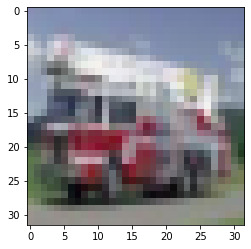

In [ ]:
## Prediction 
image_row = 89
plt.imshow(x_test[image_row])
classes[y_test[image_row][0]]

In [ ]:
## Predicted Data
classes[np.argmax(y_pred[image_row])]

'truck'